# Необходимые библиотеки

In [6]:
import pandas as pd
import numpy as np

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
import warnings

In [9]:
warnings.filterwarnings('ignore')

# Загрузка данных

In [10]:
data = pd.read_csv('hh ru DATASET.csv')
data.head()

,vacancy_id,employer_id,employees_number,creation_date,work_schedule,employment,length_of_employment,compensation_from,compensation_to,accept_teenagers,...,young_response_count,young_female_response_count,young_male_response_count,invitation_count,female_invitation_count,male_invitation_count,young_invitation_count,young_female_invitation_count,young_male_invitation_count,industry_id_list
0,77424192,2571258,300,2023-02-27,full_day,full,up_to_3_years,35000.0,0.0,False,...,4,4,0,21,21,0,0,0,0,[48]
1,78161908,4809555,50,2023-03-17,shift,full,no_experience,22500.0,NaN,False,...,5,4,1,26,26,0,2,2,0,[None]
2,79496395,5667513,5,2023-04-19,shift,full,up_to_3_years,24000.0,30000.0,False,...,2,2,0,3,3,0,0,0,0,[None]
3,87102246,1072323,0,2023-09-21,full_day,full,up_to_3_years,50000.0,NaN,False,...,0,0,0,9,7,2,0,0,0,"[7, 8]"
4,76367381,1160192,0,2023-01-30,full_day,full,up_to_3_years,55000.0,150000.0,False,...,0,0,0,49,39,10,0,0,0,"[5, 13]"


In [11]:
original_shape = data.shape
original_shape

(377765, 25)

# Обработка выбросов

#### Сначала проведём обработку выбросов, чтобы они не влияли на заполнение пропусков в дальнейшем

#### Посмотрим на число грубых выбросов по столбцам

In [12]:
num_cols = ['response_count', 'compensation_from', 'compensation_to']

#### Посмотрим некоторые боксплоты

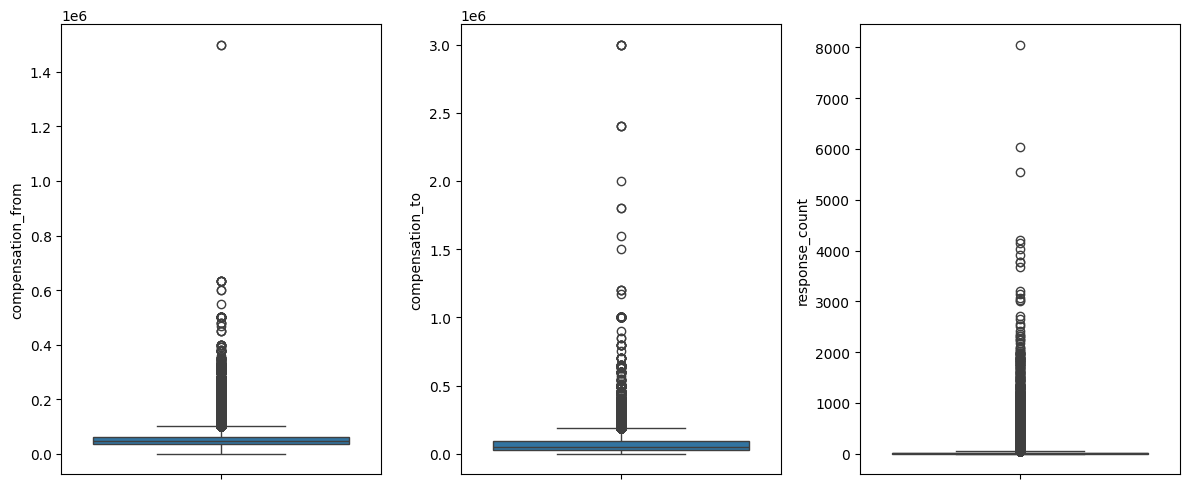

In [13]:
fig, axis = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data=data['compensation_from'], ax=axis[0])
sns.boxplot(data=data['compensation_to'], ax=axis[1])
sns.boxplot(data=data['response_count'], ax=axis[2])

plt.tight_layout()
plt.show()

#### Выбросов не так много в отношении всего датасета, поэтому будем удалять их по методу 3-х сигм, а не заменять

In [14]:
# garbage = []

# for num_col in num_cols:
#     IQR = data[data[num_col] != 0][num_col].quantile(0.75) - data[data[num_col] != 0][num_col].quantile(0.25)
#     upper_bound = data[data[num_col] != 0][num_col].quantile(0.75) + 3 * IQR
#     lower_bound = data[data[num_col] != 0][num_col].quantile(0.25) - 3 * IQR

#     if 'compensation' in num_col:
#         ejections = data[((data[num_col] > upper_bound) | (data[num_col] < lower_bound)) & (data[num_col] != 0)]
#     else:
#         ejections = data[data[num_col] > upper_bound]

#     garbage.extend(ejections.index.tolist())

# garbage = list(set(garbage))
# data = data.drop(garbage).reset_index(drop=True)

In [15]:
# garbage = []

# for num_col in num_cols:
#     upper_bound = data[data[num_col] != 0][num_col].quantile(0.975)
#     lower_bound = data[data[num_col] != 0][num_col].quantile(0.003)

#     if 'compensation' in num_col:
#         ejections = data[((data[num_col] > upper_bound) | (data[num_col] < lower_bound)) & (data[num_col] != 0)]
#     else:
#         ejections = data[data[num_col] > upper_bound]

#     garbage.extend(ejections.index.tolist())

# garbage = list(set(garbage))
# data = data.drop(garbage).reset_index(drop=True)

In [16]:
lower_bound_1 = data[data['compensation_from'] != 0]['compensation_from'].quantile(0.01)
lower_bound_2 = data[data['compensation_to'] != 0]['compensation_to'].quantile(0.01)

In [17]:
lower_bound_2

18000.0

In [18]:
data = data[(data['compensation_from'] <= 400_000) | (data['compensation_from'].isna())]
data = data[(data['compensation_to'] <= 1_000_000) | (data['compensation_to'].isna())]
data = data[data['response_count'] <= 3400]

In [19]:
data = data[(data['compensation_from'] >= lower_bound_1) | (data['compensation_from'].isna()) | (data['compensation_from'] == 0)]
data = data[(data['compensation_to'] >= lower_bound_2) | (data['compensation_to'].isna()) | (data['compensation_to'] == 0)]

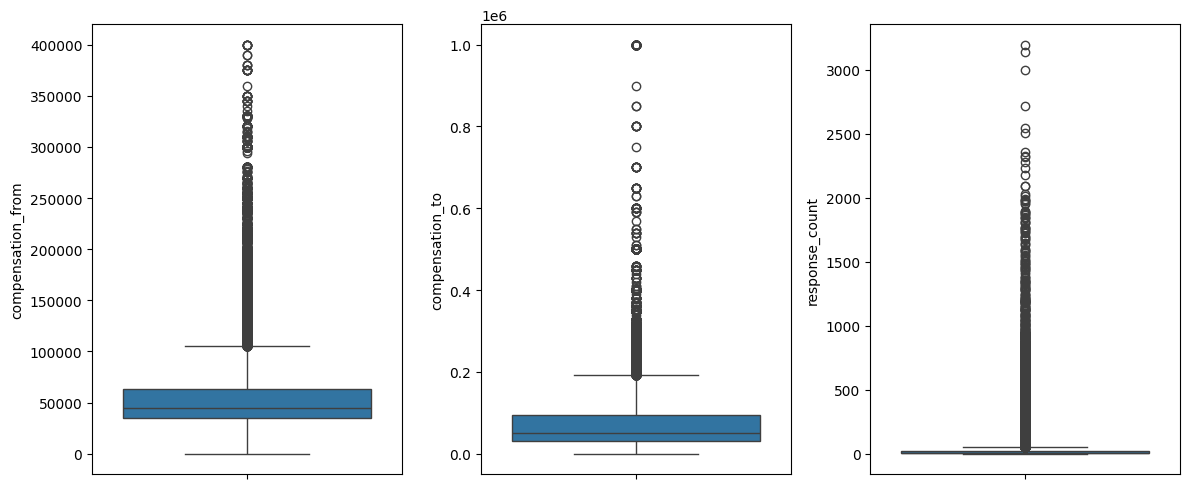

In [20]:
fig, axis = plt.subplots(1, 3, figsize=(12, 5))

sns.boxplot(data=data['compensation_from'], ax=axis[0])
sns.boxplot(data=data['compensation_to'], ax=axis[1])
sns.boxplot(data=data['response_count'], ax=axis[2])

plt.tight_layout()
plt.show()

Можно сделать ложный вывод, что выбросов стало только больше, однако это уже новое распределение, а от настоящих выбросов мы избавились

In [21]:
round(1 - data.shape[0] / original_shape[0], 4)

0.0107

In [22]:
data.shape

(373726, 25)

# Удаление некорректных данных

### Нами было обнаружено несоответствие количеств откликов и/или приглашений

In [23]:
len(data[data['response_count'] != data['female_response_count'] + data['male_response_count']])

9121

In [24]:
len(data[data['young_response_count'] != data['young_female_response_count'] + data['young_male_response_count']])

62

In [25]:
len(data[data['invitation_count'] != data['female_invitation_count'] + data['male_invitation_count']])

4627

In [26]:
len(data[data['young_invitation_count'] != data['young_female_invitation_count'] + data['young_male_invitation_count']])

33

In [27]:
data = data[data['response_count'] == data['female_response_count'] + data['male_response_count']]
data = data[data['young_response_count'] == data['young_female_response_count'] + data['young_male_response_count']]
data = data[data['invitation_count'] == data['female_invitation_count'] + data['male_invitation_count']]
data = data[data['young_invitation_count'] == data['young_female_invitation_count'] + data['young_male_invitation_count']]

### Также проверим, что количество всех приглашенных больше количества молодых приглашенных

In [28]:
all(data['response_count'] >= data['young_response_count']), all(data['invitation_count'] >= data['young_invitation_count'])

(True, True)

### Данные неточности показывали некорректность данных, поэтому их мы удалили, а не заменили

# Удаление дубликатов

На дубликатах строится наш исследовательский вопрос, поэтому их мы не удаляем, глобальных же дубликатов не обнаружено

In [29]:
sum(data.duplicated())

0

# Обработка пропусков

In [30]:
data.isna().sum()[data.isnull().sum() != 0]

compensation_from     32373
compensation_to      114663
dtype: int64

Пропуски наблюдаются только в признаках, связанных с зарплатой. 

Такие пропуски объясняются нежеланием работадателя устанавливать однозначные границы зарплаты или простым игнорированием

Помимо этого так же есть много нулевых значений в compensation_from и compensation_to

In [31]:
data[data['compensation_from'] == 0].shape[0]

6357

In [32]:
data[data['compensation_to'] == 0].shape[0]

50347

Их также необходимо обратить в nan, так как 0 - это всё равно, что отсутствие данных

Мы также проверили на всякий случай, если 0 - зарплаты волонтёров, так как им не платят, но оказалось, что это не так

In [33]:
data[data['employment'] == 'volonteer']

,vacancy_id,employer_id,employees_number,creation_date,work_schedule,employment,length_of_employment,compensation_from,compensation_to,accept_teenagers,...,young_response_count,young_female_response_count,young_male_response_count,invitation_count,female_invitation_count,male_invitation_count,young_invitation_count,young_female_invitation_count,young_male_invitation_count,industry_id_list
49839,81902096,2818876,0,2023-06-14,shift,volonteer,up_to_3_years,35000.0,50000.0,False,...,0,0,0,12,4,8,0,0,0,[None]
145838,80948808,3036416,100,2023-05-24,flexible,volonteer,no_experience,NaN,69000.0,False,...,67,50,17,1,1,0,0,0,0,[44]
227995,77374703,8980856,1,2023-02-24,flexible,volonteer,no_experience,NaN,NaN,False,...,0,0,0,4,0,4,0,0,0,[None]
357412,77073973,2818876,0,2023-02-16,shift,volonteer,up_to_3_years,35000.0,50000.0,False,...,0,0,0,10,0,10,0,0,0,[None]


### Также запишем новый категориальный столбец, который содержит информацию о том, содержались ли nan в зарплате

In [34]:
data[['compensation_from', 'compensation_to']] = data[['compensation_from', 'compensation_to']].replace(0, np.nan)

In [35]:
mask = data['compensation_from'].isna() | data['compensation_to'].isna()

In [36]:
data['correct_salary'] = mask.apply(lambda x: 'approximately' if x else 'correct')

Теперь заменим все nans в compensation_from на медианную зарплату данной профессии. Такое решение содержит множество допущений, ведь есть множество факторов, влияющих на 'compensation_from', но 'specialization' мы посчитали наиболее значимым и достаточным (как аргумент, там нет пропусков и на каждое уникальное значение в среднем 15000 сэмплов)

Технически также можно взять медианную более мелких групп, вроде сочетаний профессии и региона, профессии и работодателя, но эти группы могут быть крайне маленькими или вообще не быть, что неинформативно, поэтому мы посчитали, что только профессии будет достаточно.

##### Также мы посчитали коэффициент корреляции eta для пар: 'compensation_from' и 'specialization', 'compensation_from' и 'region_name'

In [37]:
def get_eta_correlation(categorical_col):
    groups = [data['compensation_from'][data[categorical_col] == value] for value in data[categorical_col].unique()]
        
    total_variance = np.var(data['compensation_from'])
    group_means = [g.mean() for g in groups]
    group_sizes = [len(g) for g in groups]
    group_variance = sum(size * (mean - data['compensation_from'].mean()) ** 2 for size, mean in zip(group_sizes, group_means)) / len(data)

    return np.round(group_variance / total_variance, 3)

In [38]:
get_eta_correlation('specialization')

0.282

In [39]:
get_eta_correlation('region_name')

0.025

Заметим, что специализация влияет на зарплату гораздо значимее, чем регион

In [40]:
data['compensation_from'] = data['compensation_from'].fillna(
    data.groupby('specialization')['compensation_from'].transform('median')
)

In [41]:
'''случаи, где compensation_from > compensation_to'''

data[(data['compensation_from'] > data['compensation_to']) & (data['compensation_to'] != 0)].shape[0]

4168

Также есть данные, где compensation_from, в которой мы заполняли пропуски, больше чем compensation_to. В таких случаях мы опустим compensation_from до уровня compensation_to

In [42]:
data.loc[(data['compensation_from'] > data['compensation_to']) & (data['compensation_to'] != 0), 'compensation_from'] = data['compensation_to']

In [43]:
data['compensation_to'] = data['compensation_to'].fillna(data['compensation_from'])

In [44]:
sum(data.isnull().sum())

0

# Дополнительные колонки

Добавим данные о длине списка id индустрий

In [45]:
data['industry_id_list'] = data['industry_id_list'].apply(eval)

In [46]:
data['length_industry_list'] = data['industry_id_list'].apply(lambda x: len(x) if int(bool(x[0])) else 0)

In [47]:
data['length_industry_list'].value_counts()

length_industry_list
0    149599
1    139064
2     60847
3     12361
4      2267
5       372
Name: count, dtype: int64

# Сохранение датасета

In [48]:
data.to_csv('cleared_data_2.csv', index=False)

In [49]:
pd.read_csv('cleared_data_2.csv').describe()

,vacancy_id,employer_id,employees_number,compensation_from,compensation_to,response_count,female_response_count,male_response_count,young_response_count,young_female_response_count,young_male_response_count,invitation_count,female_invitation_count,male_invitation_count,young_invitation_count,young_female_invitation_count,young_male_invitation_count,length_industry_list
count,3.645100e+05,3.645100e+05,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000,364510.000000
mean,8.355622e+07,3.524930e+06,9473.684110,54149.284264,69865.021972,22.587847,13.288714,9.299133,1.777106,1.153850,0.623256,17.340279,9.955192,7.385087,0.891120,0.569743,0.321377,0.847080
std,4.568527e+06,3.131970e+06,45551.174911,30992.536406,47992.522426,48.915636,36.400409,20.602386,7.545437,5.198189,2.873903,45.651520,32.992194,20.568261,5.539305,3.700119,2.142489,0.872871
min,7.453818e+07,6.000000e+00,0.000000,15000.000000,15000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.964986e+07,8.588790e+05,1.000000,35000.000000,40000.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.361154e+07,2.971218e+06,50.000000,45000.000000,50408.000000,10.000000,4.000000,4.000000,0.000000,0.000000,0.000000,6.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,8.768533e+07,5.193273e+06,1100.000000,60000.000000,80000.000000,22.000000,12.000000,9.000000,1.000000,0.000000,0.000000,17.000000,9.000000,6.000000,0.000000,0.000000,0.000000,1.000000
max,9.116080e+07,1.123410e+07,682000.000000,400000.000000,1000000.000000,3139.000000,2386.000000,1014.000000,478.000000,293.000000,231.000000,4958.000000,4726.000000,2007.000000,691.000000,434.000000,257.000000,5.000000
